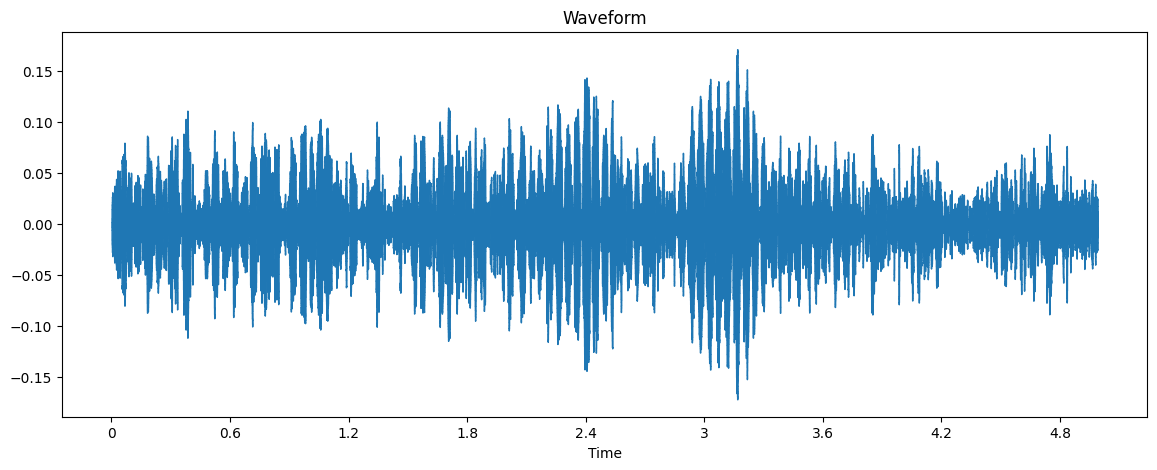

<ipython-input-2-da2bacdbdc7a>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


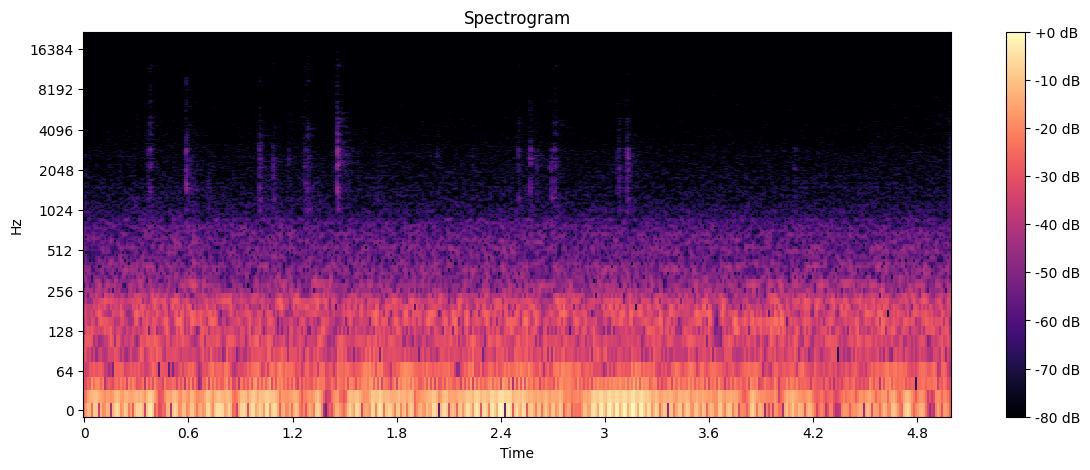

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
y, sr = librosa.load('/content/Device1_2025-01-28_15-17-11.wav', sr=None)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

# Plot the spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [3]:
# Calculate the root mean square (RMS) energy
rms_energy = librosa.feature.rms(y=y)[0]

# Check if the audio is silent (RMS energy below a threshold)
threshold = 0.01  # Adjust this threshold as needed
is_silent = np.mean(rms_energy) < threshold
print(f"Is the audio silent? {is_silent}")

Is the audio silent? False


In [4]:
# Use librosa.pyin for pitch detection
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

# Calculate the mean pitch
mean_pitch = np.mean(pitches[pitches > 0])  # Ignore zero values
print(f"Mean pitch: {mean_pitch}")

Mean pitch: 202.32273864746094


In [5]:
import soundfile as sf

# Check audio file properties
info = sf.info('/content/Device1_2025-01-28_15-17-11.wav')
print(info)

/content/Device1_2025-01-28_15-17-11.wav
samplerate: 44100 Hz
channels: 1
duration: 4.992 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
